<a href="https://colab.research.google.com/github/tnattawat/Portfolio/blob/master/TH_COVID19_Topp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Thailand COVID-19 Visualization & Prediction

By Topp Theeralerttham (updated 5 January 2021)

### Table of Contents
1. <a href="#scrollTo=kpsDAPFdaw1O&line=1&uniqifier=1">Introduction</a>
2. <a href="#scrollTo=g6HuP8LnbRwn&line=1&uniqifier=1">Data</a>
3. <a href="#scrollTo=4gdiarE-dadu&line=1&uniqifier=1">Exploratory Analysis
4. <a href="#scrollTo=z9keitZ9-1iR&line=1&uniqifier=1">Forecasting with Machine Learning</a>
5. <a href="#scrollTo=z9keitZ9-1iR&line=1&uniqifier=1">COVID-19 in Thailand</a>
6. <a href="#scrollTo=n6UX4u4DczAz&line=1&uniqifier=1">Conclusion</a>

## 1. Introduction

Coronavirus is a contagious respiratory virus that first reported in Wuhan, China. On 11 February 2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. 

This notebook will explore COVID-19 through data analysis and projections. Specifically, we will build a machine learning model to forecast global cases of COVID-19 over the next 90 days and visualize the result.

## 2. Data

We will obtain coronavirus case data from [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data). Johns Hopkins University Center for Systems Science and Engineering hosts a data repository for coronavirus cases globally. The repository is curated from a number of sources such as World Health Organization (WHO), European Centre for Disease Prevention and Control (ECDC), and US Centers for Disease Control and Prevention.



## 3. Exploratory Analysis

### Import libraries

In [1]:
# library for general computation
import random
import math
import time
import datetime
import operator

# library to handle data in a vectorized manner
import numpy as np

# library for data analysis
import pandas as pd
pd.set_option('max_columns', None)

# library to create visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('seaborn')
plt.rcParams['axes.formatter.useoffset'] = False

# library for machine learning
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR

# library for machine learning evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### Obtain data of COVID-19 cases

Obtain COVID-19 global case data from Johns Hopkins University on GitHub

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-04-2021.csv')

### Explore the data

Quickly inpsect COVID-19 case data

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,10001,10585,11176,11834,12459,13039,13662,14528,15208,15753,16512,17270,18057,18972,19554,20345,20920,21462,22146,22894,23550,24106,24770,25531,26314,26878,27536,27882,28428,28837,29147,29471,29705,30165,30441,30606,30957,31228,31507,31826,32012,32314,32662,32941,33180,33374,33584,33898,34184,34356,34441,34595,34730,34984,35060,35219,35279,35453,35493,35605,35717,35918,35978,36026,36147,36253,36358,36463,36532,36665,36700,36701,36737,36773,36820,36928,37006,37046,37083,37153,37260,37336,37422,37497,37542,37590,37667,37710,37750,37852,37885,37944,37990,38045,38061,38103,38119,38130,38133,38155,38159,38193,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38897,38919,39044,39074,3909

In [4]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,4,4,4,4,4,4,8,10,12,15,16,16,17,18,18,19,22,23,29,30,30,30,33,36,36,40,40,43,47,52,58,59,61,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,170,173,178,188,194,206,217,219,220,221,228,236,247,250,258,266,274,298,304,313,331,361,373,388,409,430,450,455,475,482,495,508,550,552,573,585,597,617,638,674,682,716,728,740,752,780,809,821,828,866,900,922,939,959,973,996,1012,1040,1064,1096,1117,1149,1166,1183,1185,1188,1192,1213,1227,1249,1261,1271,1272,1273,1283,1284,1285,1286,1290,1290,1296,1301,1310,1315,1321,1329,1346,1356,1365,1370,1371,1376,1378,1382,1384,1386,1386,1386,1388,1390,1398,1402,1402,1403,1403,1403,1403,1407,1410,1410,1410,1410,1413,1416,1419,1421,1421,1421,1421,1421,1427,1428,1438,1438,1439,1439,1443,1446,1447,1448,1453,1453,1455,1455,1458,1460,1460,1460,1460,1464,1464,1468,1469,1471,1472,1474,1475,1479,1481,1482,1483,1483,1487,1490,1494,1499,1501,1503,1507,1509,1513,1516,1520,1525,1531,1534,1535,1538,1538,1544,1547,1551,1557,1557,1559,1565,1577,1580,1584,1594,1598,1608,16

In [5]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576,32576,32610,32619,32619,32635,32642,32642,32746,32789,32842,32842,32842,32852,32879,32977,33045,33058,33058,33064

In [6]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-05 05:21:49,33.93911,67.709953,53011,2237,42530,8244.0,Afghanistan,136.175852,4.219879
1,NaN,NaN,NaN,Albania,2021-01-05 05:21:49,41.15330,20.168300,59623,1199,34996,23428.0,Albania,2071.825700,2.010969
2,NaN,NaN,NaN,Algeria,2021-01-05 05:21:49,28.03390,1.659600,100645,2777,67999,29869.0,Algeria,229.515635,2.759203
3,NaN,NaN,NaN,Andorra,2021-01-05 05:21:49,42.50630,1.521800,8249,84,7548,617.0,Andorra,10676.244095,1.018305
4,NaN,NaN,NaN,Angola,2021-01-05 05:21:49,-11.20270,17.873900,17684,408,11266,6010.0,Angola,53.805926,2.307170


Quickly inspect the mobility data

### Preprocess the data

Get all the dates for the ongoing COVID-19 pandemic

In [7]:
# inspect the column keys
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/26/20', '12/27/20', '12/28/20', '12/29/20', '12/30/20', '12/31/20',
       '1/1/21', '1/2/21', '1/3/21', '1/4/21'],
      dtype='object', length=353)

In [8]:
# select only the columns containing dates
confirmed = confirmed_df.loc[:, cols[4]:]
death = death_df.loc[:, cols[4]:]
recovered = recovered_df.loc[:, cols[4]:]

# get a list of all dates
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/26/20', '12/27/20', '12/28/20', '12/29/20', '12/30/20', '12/31/20',
       '1/1/21', '1/2/21', '1/3/21', '1/4/21'],
      dtype='object', length=349)

Calculate the sum and rate of cases in time series

In [9]:
world_cases = []
death_cases = []
recovered_cases = []
active_cases = []
mortality_rate = []
recovery_rate = []

for i in dates:
  confirmed_sum = confirmed[i].sum()
  death_sum = death[i].sum()
  recovered_sum = recovered[i].sum()

  # confirmed, death, recovered, and active
  world_cases.append(confirmed_sum)
  death_cases.append(death_sum)
  recovered_cases.append(recovered_sum)
  active_cases.append(confirmed_sum - death_sum - recovered_sum)

  # rate of cases
  mortality_rate.append(death_sum / confirmed_sum)
  recovery_rate.append(recovered_sum / confirmed_sum)

Get daily increases and moving average

In [10]:
# create functions for the calculation
def daily_increase(data):
    d = []
    for i in range(len(data)):
      if i == 0:
        d.append(data[0])
      else:
        d.append(data[i] - data[i-1])
    return d

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
      if i + window_size < len(data):
        moving_average.append(np.mean(data[i:i+window_size]))
      else:
        moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

In [11]:
# window_size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg = moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# death 
world_daily_death = daily_increase(death_cases)
world_death_avg = moving_average(death_cases, window)
world_daily_death_avg = moving_average(world_daily_death, window)

# recoveries
world_daily_recovered = daily_increase(recovered_cases)
world_recovered_avg = moving_average(recovered_cases, window)
world_daily_recovered_avg = moving_average(world_daily_recovered, window)

# active
world_active_avg = moving_average(active_cases, window)

In [12]:
# turn the above lists into numpy array 
# and reshape the dataframe
world_cases = np.array(world_cases).reshape(-1, 1)
death_cases = np.array(death_cases).reshape(-1, 1)
recovered_cases = np.array(recovered_cases).reshape(-1, 1)

# create a numpy array containing number of days since 22 January 2020
days_since_22JAN2020 = np.array([i for i in range(len(dates))]).reshape(-1 ,1)

## 4. Forecasting with Machine Learning

Define basic elements for forcasting

In [13]:
# define forecasting detail 
days_in_future = 25
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-25]

# convert integer into datetime for visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

future_forecast_dates = []
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

#### Visualize global cases, deaths, recoveries, and active cases

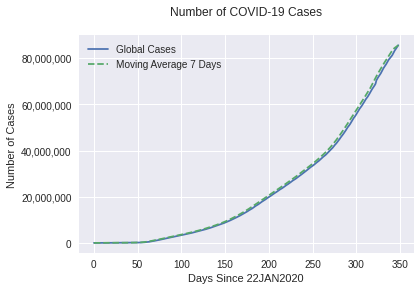

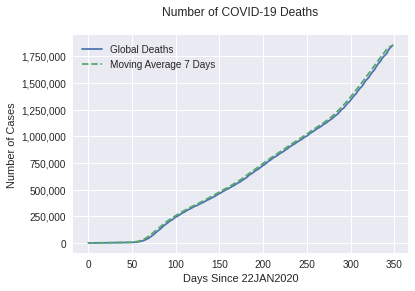

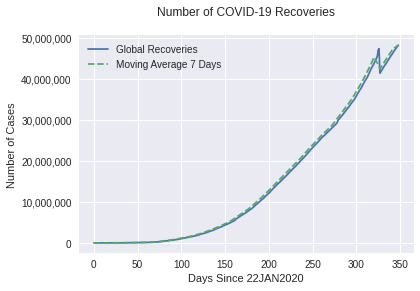

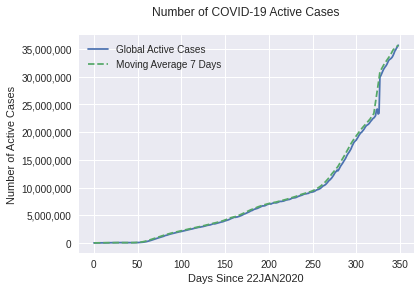

In [14]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

# global cases
fig1, ax1 = plt.subplots()
ax1.plot(adjusted_dates, world_cases)
ax1.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed')
ax1.set(title='Number of COVID-19 Cases\n',
       xlabel='Days Since 22JAN2020',
       ylabel='Number of Cases')
ax1.legend(['Global Cases', 'Moving Average {} Days'.format(window)])
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
print('\n')

# death cases
fig2, ax2 = plt.subplots()
ax2.plot(adjusted_dates, death_cases)
ax2.plot(adjusted_dates, world_death_avg, linestyle='dashed')
ax2.set(title='Number of COVID-19 Deaths\n',
              xlabel='Days Since 22JAN2020',
              ylabel='Number of Cases')
ax2.legend(['Global Deaths', 'Moving Average {} Days'.format(window)])
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
print('\n')

# recovery cases
fig3, ax3 = plt.subplots()
ax3.plot(adjusted_dates, recovered_cases)
ax3.plot(adjusted_dates, world_recovered_avg, linestyle='dashed')
ax3.set(title='Number of COVID-19 Recoveries\n',
        xlabel='Days Since 22JAN2020',
        ylabel='Number of Cases')
ax3.legend(['Global Recoveries', 'Moving Average {} Days'.format(window)])
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()
print('\n')

# active cases
fig4, ax4 = plt.subplots()
ax4.plot(adjusted_dates, active_cases)
ax4.plot(adjusted_dates, world_active_avg, linestyle='dashed')
ax4.set(title='Number of COVID-19 Active Cases\n', 
        xlabel='Days Since 22JAN2020',
        ylabel='Number of Active Cases')
ax4.legend(['Global Active Cases', 'Moving Average {} Days'.format(window)])
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Build machine learning model for future forecasting

Prepare train & test datasets for machine learning model

In [15]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_22JAN2020[50:], world_cases[50:], test_size=0.05, shuffle=False)

Create a function to plot predictions

In [16]:
def plot_predictions(x, y, pred, algo_name, title):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot(future_forecast, pred, linestyle='dashed')
    ax.set(title=title,
           xlabel='Days since 22 January 2020',
           ylabel='Number of Cases')
    ax.legend(['Confirmed Cases', algo_name])
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()

#### Prediction with Support Ventor Machine

Build SVM model

Mean Absolute Error:  464407.9312615335
Mean Squared Error: 263296093386.29648


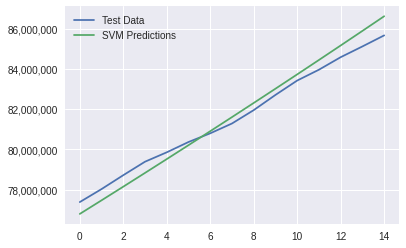

In [17]:
# create and fit SVM model with training data
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

# evaluate the model with test data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)

# visualize the result
fig, ax = plt.subplots()
ax.plot(y_test_confirmed)
ax.plot(svm_test_pred)
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(['Test Data', 'SVM Predictions'])

print('Mean Absolute Error: ', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('Mean Squared Error:', mean_squared_error(svm_test_pred, y_test_confirmed))


Predict for confirmed COVID-19 global cases

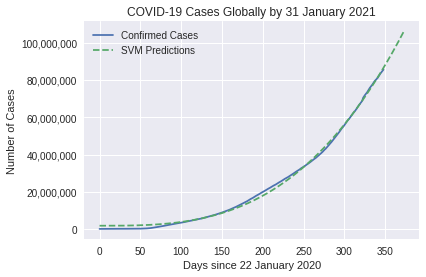

In [18]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'COVID-19 Cases Globally by 31 January 2021')

## 5. COVID-19 in Thailand

We will now examine the CAOVID-19 pandemic at a loca level and look at specific countries. We will demonstrate the methodology with an example of Thailand.

First, let's define functions for computation and visualization.

In [19]:
def country_plot(x, y1, y2, country):
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)

    fig1, ax1 = plt.subplots()
    ax1.plot(x, y1)
    ax1.plot(x, y2, linestyle='dashed')
    ax1.set(title='{} Confirmed Cases'.format(country),
            xlabel='Days since 22 January 2020',
            ylabel='Number of Cases')
    ax1.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)])
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()

    fig2, ax2 = plt.subplots()
    ax2.plot(x, y2)
    ax2.plot(x, confirmed_increase_avg, linestyle='dashed')
    ax2.set(title='{} Daily Increase in Confirmed Cases'.format(country),
            xlabel='Days since 22 January 2020',
            ylabel='Number of Cases')
    ax2.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)])
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.show()

def get_country_info(country_name):
    country_cases = []
    for i in dates:
      country_cases.append(confirmed_df[confirmed_df['Country/Region'] == country_name][i].sum())
    return country_cases

def country_visualizations(country_name):
    country_cases = get_country_info(country_name)
    country_daily_increase = daily_increase(country_cases)
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_name)

Now we can apply the above functions on a country. In this case, Thailand.

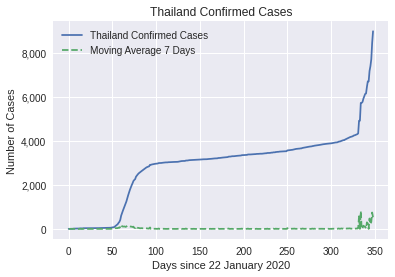

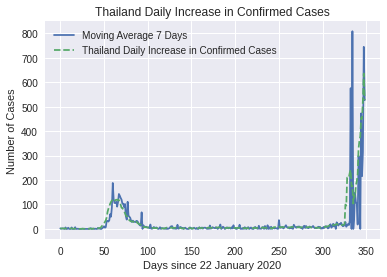

In [20]:
country_visualizations('Thailand')

### Build machine learning model for Thailand

In [51]:
# subset for COVID-19 cases in Thailand
Thailand_cases = []
for i in dates:
  Thailand_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'Thailand'][i].sum())

# split data into train & test sets
X_train_confirmed_TH, X_test_confirmed_TH, y_train_confirmed_TH, y_test_confirmed_TH = train_test_split(days_since_22JAN2020[90:], Thailand_cases[90:], test_size=0.10)

In [52]:
# create and fit SVM model with training data
svm_confirmed_TH = SVR(kernel='poly', degree=8)
svm_confirmed_TH.fit(X_train_confirmed_TH, y_train_confirmed_TH)
svm_pred_TH = svm_confirmed_TH.predict(future_forecast)

In [53]:
# evaluate the model with test data
svm_test_pred_TH = svm_confirmed_TH.predict(X_test_confirmed_TH)
print('Mean Absolute Error: ', mean_absolute_error(svm_test_pred_TH, y_test_confirmed_TH))
print('Mean Squared Error:', mean_squared_error(svm_test_pred_TH, y_test_confirmed_TH))

Mean Absolute Error:  169.41176772533493
Mean Squared Error: 59315.24749027537


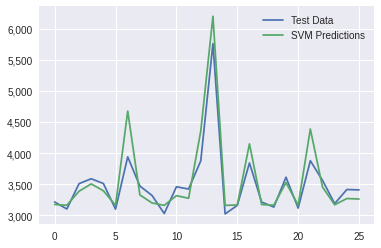

In [54]:
# visualize the result
fig, ax = plt.subplots()
ax.plot(y_test_confirmed_TH)
ax.plot(svm_test_pred_TH)
ax.ticklabel_format(useOffset=False, style='plain')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(['Test Data', 'SVM Predictions'])

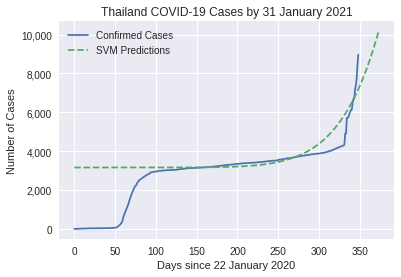

In [55]:
plot_predictions(adjusted_dates, Thailand_cases, svm_pred_TH, 'SVM Predictions', 'Thailand COVID-19 Cases by 31 January 2021')

## 6. Conclusion

Baed on our analysis of COVID-19 cases since 22 January 2020, we built a machine learning model and made a prediction. Our Support Vector Machine predicts that the world will soon see 100,000,000 cases of COVID-19 by the end of January 2021.

Looking specifically into Thailand, the Support Vector Machine predicts that COVID-19 cases in Thailand will reach 14,000 cases by the end of January 2021.